In [ ]:
# mount google drive
from google.colab import drive
drive.mount("/content/drive")

#import data from my google drive folder
import pandas as pd 
df = pd.read_csv("/content/drive/MyDrive/6211 Advance Business Analytics /Data/HEMQ.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe(include="all")
#first we want to deal with the missing values


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [ ]:
#missing value
#df.df.dropna().reset_index(drop=True)
NA_Names = ["MORTDUE","VALUE","YOJ","DEROG","DELINQ","CLAGE","NINQ","CLNO","DEBTINC"]
df[NA_Names]=df[NA_Names].fillna(df[NA_Names].mean())

df["REASON"]=df["REASON"].fillna("DebtCon")
df["JOB"]=df["JOB"].fillna("Other")
df.describe(include='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960,5960,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4180,2667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,NaN,NaN,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,NaN,NaN,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,NaN,NaN,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,NaN,NaN,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892


In [ ]:
# scaling
#for nn you should scale first if you dont scale first to make every variable to use the same unit to make our weight more consistent
#you can only use scaling on numerical variables you need to seperate the cat variables
X = pd.concat([df.iloc[:,1:4],df.iloc[:,6:13]],axis=1)
names=X.columns

#common way to scale data minimum max scalar and standardization
#for min max end results range from 0 -1
#for standardization x-mean/std   
#depends on which one has better results??? pca needs standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X[names]=scaler.transform(X)
#this is our scaled observation min 0 max is 1 this only works for numerical no need for categorical
X.describe(include='all')

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.197162,0.180378,0.110597,0.217616,0.025457,0.029963,0.153879,0.069768,0.299945,0.163991
std,0.126210,0.106875,0.067040,0.176568,0.079420,0.071400,0.071529,0.097238,0.140117,0.037639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112613,0.115918,0.068981,0.073171,0.000000,0.000000,0.100469,0.000000,0.211268,0.149115
50%,0.171171,0.169731,0.096708,0.195122,0.000000,0.000000,0.152432,0.058824,0.295775,0.163991
75%,0.250000,0.216705,0.130916,0.292683,0.000000,0.029963,0.194433,0.117647,0.366197,0.184555
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#python can drop auotmatically as a baseline with the drop_first parameter
dummy_data = pd.get_dummies(df[['REASON','JOB']],drop_first=True)
dummy_data
#combine scaled df with dummied df
X =pd.concat([X,dummy_data],axis=1)
X.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.197162,0.180378,0.110597,0.217616,0.025457,0.029963,0.153879,0.069768,0.299945,0.163991,0.298658,0.159060,0.447483,0.214094,0.018289,0.032383
std,0.126210,0.106875,0.067040,0.176568,0.079420,0.071400,0.071529,0.097238,0.140117,0.037639,0.457708,0.365763,0.497276,0.410227,0.134004,0.177029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112613,0.115918,0.068981,0.073171,0.000000,0.000000,0.100469,0.000000,0.211268,0.149115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.171171,0.169731,0.096708,0.195122,0.000000,0.000000,0.152432,0.058824,0.295775,0.163991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.216705,0.130916,0.292683,0.000000,0.029963,0.194433,0.117647,0.366197,0.184555,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y= df['BAD']
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=0)


In [ ]:
#next step we want to train our neural network
from sklearn.neural_network import MLPClassifier
#need to specify layer size dependant on the data set
#this is 2 hidden layers one with 5 nodes 1 with 3
NN = MLPClassifier(hidden_layer_sizes=(5,3),max_iter=1000)
NN.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=1000)

In [ ]:
#now we will look at the coef which is our weight
#input layer to first hidden layer
print(NN.coefs_[0])
print(NN.coefs_[1])
print(NN.coefs_[2])

[[ 5.87201728e-001  5.13866549e-001  2.94683974e-057 -8.50394563e-002
  -1.10168973e-001]
 [ 5.46821187e-001  6.08919992e-001 -1.29041808e-098  1.24794834e-001
   2.66710568e-001]
 [-2.93385919e-001  1.90564256e-001 -8.70532174e-045  1.04873273e+000
  -2.22045276e-001]
 [-4.59470745e-002  4.35197530e-001  2.26156257e-041  2.69319806e-001
   4.79327974e-001]
 [-2.90839337e-002 -3.35087912e-001 -2.22972342e-036  1.29361812e+000
  -3.80873463e-001]
 [-1.27460965e+000 -2.12037448e+000 -1.33184572e-084  1.95969944e+000
  -9.52356179e-001]
 [ 4.62032795e-001  1.28958724e+000  2.04689517e-073 -6.87527302e-001
   1.48367501e+000]
 [ 1.28032974e-002 -6.24529426e-001 -1.85994561e-078  5.75576878e-001
  -2.74013089e-001]
 [ 8.28900081e-001  6.25040944e-001 -1.14012323e-095  4.42287992e-001
   8.08092516e-002]
 [-6.94625541e-001 -7.45540419e-001  3.64264380e-089  8.81302832e-001
  -5.20347537e-001]
 [ 3.17928088e-001 -6.02877246e-003  9.48182256e-083  1.94294592e-001
  -2.05911323e-002]
 [ 7.58223

In [ ]:
#performance of the nn
#called nn score this is the performance score
NN.score(X_val,y_val) #accuracy  due note that this is the default activation function you can try a different oen or change number of layers and nodes

0.8322147651006712

In [ ]:
#next we want to do a roc auc cruve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
#first we generate predicted probability based on our x in the validation dataset
prediction_prob = NN.predict_proba(X_val)
#print(prediction_prob) 
nn_auc = roc_auc_score(y_val, prediction_prob[:,1])

print(nn_auc)

0.7899125491206598


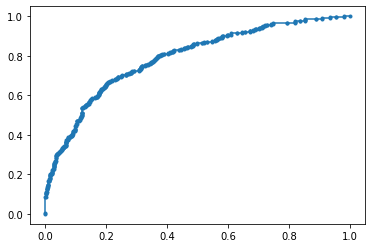

In [ ]:
nn_fpr, nn_tpr, threshold = roc_curve(y_val,prediction_prob[:,1])
plt.plot(nn_fpr,nn_tpr,marker='.')
plt.show()